# Empirical validation of bounds (plots)

This figure contains three plots that illustrate the theoretical bounds on the total and maximum displacement, as well as on the aggregation of multiple Quicksort outputs.

It uses data generated from `empirical-displacement-bounds.ipynb`.

In [1]:
import matplotlib.pyplot as plt
import pickle
import thesis

%matplotlib inline

In [2]:
thesis.setup_plotting()

Thesis settings loaded!


## Load the data

In [3]:
with open("data/empirical-bounds/sum.pickle", "rb") as f:
    data_sum = pickle.load(f)
with open("data/empirical-bounds/max.pickle", "rb") as f:
    data_max = pickle.load(f)
with open("data/empirical-bounds/agg.pickle", "rb") as f:
    data_agg = pickle.load(f)

## Plot it

In [4]:
ls = ("solid", "dotted", "solid", "dotted")
marker = ("s", "s", "o", "o")
mfc = ("black", "white", "black", "white")

/Users/maystre/.virtualenvs/thesis/lib/python3.5/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


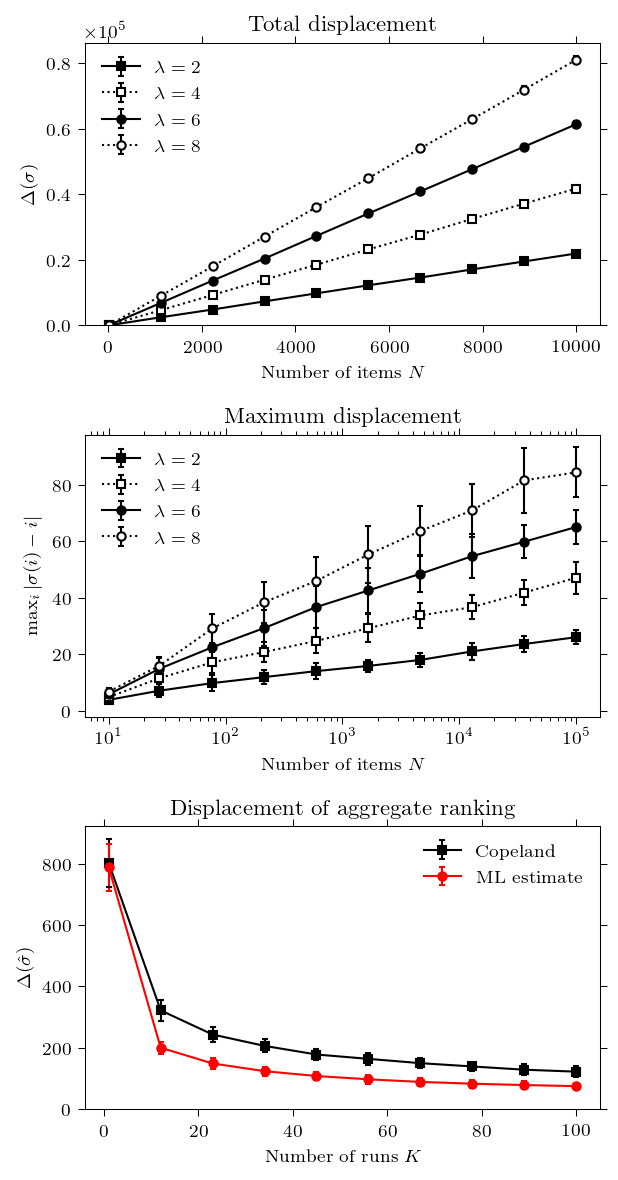

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(4.25, 8.0))

# Total displacement.
for i, r in enumerate(data_sum["rates"]):
    avg = data_sum["avg"][i]
    std = data_sum["std"][i]
    ax1.errorbar(data_sum["ns"], avg, yerr=std, label="$\lambda = {}$".format(r),
            capsize=1.5, color="black",
            marker=marker[i], markerfacecolor=mfc[i], linestyle=ls[i])
ax1.legend(loc="upper left")
ax1.yaxis.get_major_formatter().set_powerlimits((0, 1))
ax1.set_ylim(ymin=0)
ax1.set_title("Total displacement")
ax1.set_ylabel(r"$\Delta(\sigma)$")
ax1.set_xlabel("Number of items $N$")

# Maximum displacement.
for i, r in enumerate(data_max["rates"]):
    avg = data_max["avg"][i]
    std = data_max["std"][i]
    ax2.errorbar(data_max["ns"], avg, yerr=std, label="$\lambda = {}$".format(r),
            capsize=1.5, color="black",
            marker=marker[i], markerfacecolor=mfc[i], linestyle=ls[i])
ax2.set_xscale("log")
ax2.legend(loc="upper left")
ax2.set_title("Maximum displacement")
ax2.set_ylabel(r"$\max_i |\sigma(i) - i|$")
ax2.set_xlabel("Number of items $N$")

# Copeland aggregation.
ax3.errorbar(data_agg["ms"], data_agg["avg_cop"], yerr=data_agg["std_cop"], label="Copeland",
        capsize=1.5, marker="s", markerfacecolor="black", color="black")
# ML aggregation.
ax3.errorbar(data_agg["ms"], data_agg["avg_mle"], yerr=data_agg["std_mle"], label="ML estimate",
        capsize=1.5, marker="o", markerfacecolor="red", color="red")
ax3.legend(loc="upper right")
ax3.set_ylim(ymin=0)
ax3.set_title("Displacement of aggregate ranking")
ax3.set_ylabel(r"$\Delta(\hat{\sigma})$")
ax3.set_xlabel("Number of runs $K$")

fig.savefig("bounds.pdf")